## Getting Started with PyMCMC: Classic Function Fitting

This tutorial demonstrates the standard workflow for fitting a physical model to noisy data using the **DRAM (Delayed Rejection Adaptive Metropolis)** algorithm.

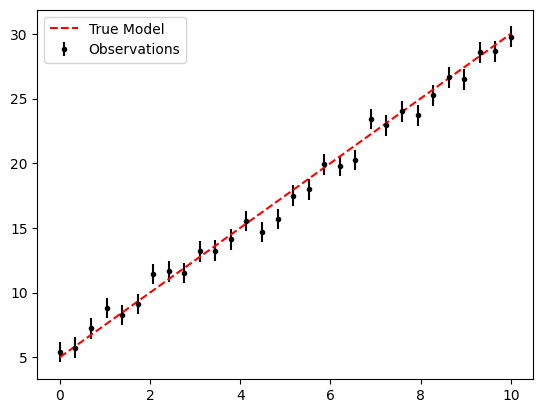

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyMCMC import FunctionFitter, Prior, MCMCAnalyzer

# Generate synthetic data: y = a*x + b + noise
np.random.seed(42)
x_obs = np.linspace(0, 10, 30)
true_params = [2.5, 5.0]  # slope, intercept
y_true = true_params[0] * x_obs + true_params[1]
y_err = 0.8
y_obs = y_true + np.random.normal(0, y_err, size=len(x_obs))

plt.errorbar(x_obs, y_obs, yerr=y_err, fmt='.k', label="Observations")
plt.plot(x_obs, y_true, 'r--', label="True Model")
plt.legend()
plt.show()

We need to define our model function and specify our Priors. Priors represent our knowledge about parameters before looking at the data.

In [2]:
def linear_model(x, p):
    return p[0] * x + p[1]

# Define Priors: Uniform for slope, Gaussian for intercept
priors = [
    Prior('uniform', (0, 10)),
    Prior('gaussian', (5, 2))
]

fitter = FunctionFitter(
    model_func=linear_model,
    x_data=x_obs,
    y_data=y_obs,
    y_err=y_err,
    priors=priors
)

# Run MCMC fit
chain = fitter.fit(initial_params=[1.0, 1.0], n_iterations=10000, show_progress=True)

MCMC Sampling: 100%|██████████| 10000/10000 [00:00<00:00, 24746.30it/s]


We use the ```MCMCAnalyzer``` to check convergence and visualize results.


Parameter       | Mean ± std           | HDI 95%              | MAP       
-------------------------------------------------------------------------------------
Slope           | 2.4190 ± 0.0466  | [2.331, 2.509] |   2.4174
Intercept       | 5.2598 ± 0.2717  | [4.714, 5.731] |   5.2582

 Minimum reduced Chi2: 0.740
 AIC: 79.406 | BIC: 82.209 | WAIC: 78.295


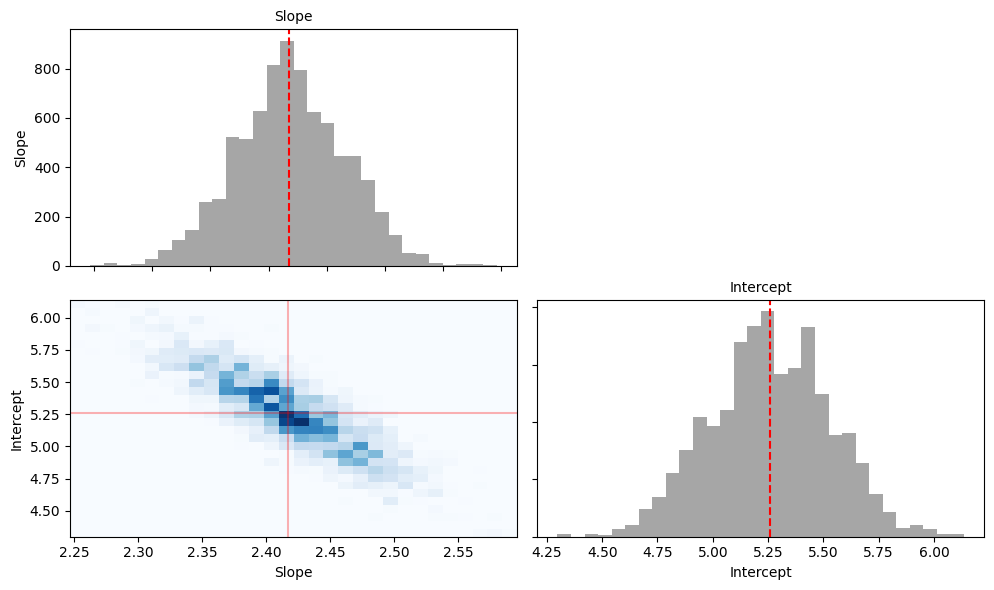

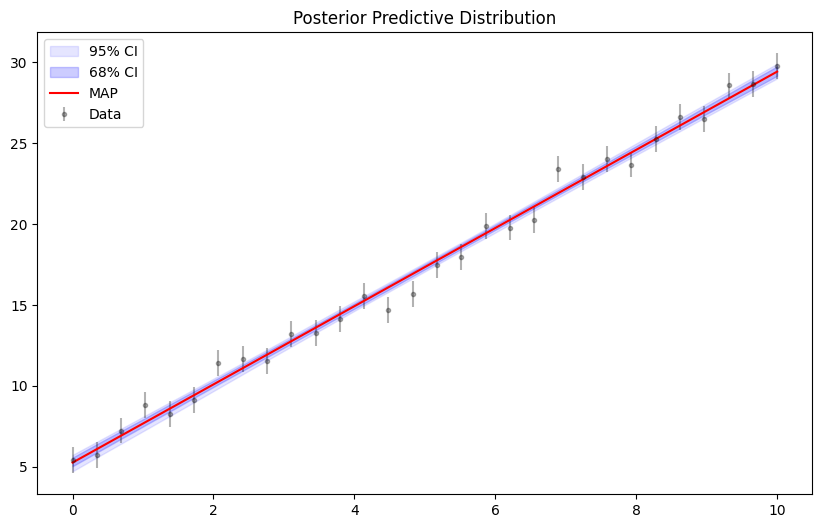

In [3]:
analyzer = MCMCAnalyzer(chain, fitter=fitter, burn_in_fraction=0.2)
analyzer.print_summary(param_names=["Slope", "Intercept"])
analyzer.plot_corner(param_names=["Slope", "Intercept"])
analyzer.plot_posterior_predictive()